<div style="border: 2px solid #008CBA; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: sans-serif;">
    <h1 style="color: #005f73; border-bottom: 2px solid #005f73; padding-bottom: 10px;">
        Project Step 1: Data Loading & Initial Exploration
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        This initial phase is the foundation of our project. The primary goal is to load the IMDb dataset and perform a thorough exploratory data analysis (EDA) to understand its structure, content, and characteristics before any cleaning or modeling.
    </p>

<h2 style="color: #0077b6;">Key Objectives & Actions</h2>
    
<ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 15px;">
            <strong>Environment Setup:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Imported essential Python libraries: <code>pandas</code> for data manipulation, and <code>matplotlib</code>/<code>seaborn</code> for visualization.</li>
                <li>Set a consistent and readable style for all our plots.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Data Loading:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Loaded the <code>IMDB Dataset.csv</code> into a pandas DataFrame named <code>df</code>.</li>
                <li>Used a <code>try-except</code> block for robust error handling in case the file path is incorrect.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Initial Data Inspection (Health Check):</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Checked the dataset's dimensions (shape): 50,000 rows and 2 columns.</li>
                <li>Examined the first and last few rows using <code>df.head()</code> and <code>df.tail()</code> to get a qualitative feel for the data.</li>
                <li>Used <code>df.info()</code> to confirm column data types (<code>object</code> for both) and check for non-null counts.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Analysis & Visualization:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Target Variable Analysis:</strong> Analyzed the <code>sentiment</code> column distribution and confirmed the dataset is perfectly balanced (25,000 positive, 25,000 negative).</li>
                <li><strong>Feature Content Exploration:</strong> Inspected individual raw reviews, noting the presence of HTML tags (<code>&lt;br /&gt;</code>), punctuation, and varied capitalization, which highlights the need for text preprocessing.</li>
                <li><strong>Review Length Analysis:</strong> Calculated and plotted the distribution of review lengths (character count) to check for outliers and compare characteristics between positive and negative reviews.</li>
            </ul>
        </li>
    </ol>

<div style="background-color: #e0f2f1; border-left: 5px solid #00897b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #004d40; margin-top: 0;">Key Findings & Conclusion</h3>
        <p style="color: #333; margin: 0;">
            The dataset is <strong>complete</strong> (no missing values) and <strong>perfectly balanced</strong>, which is ideal for a classification task. The 'review' text is raw and will require a comprehensive cleaning pipeline. We are now well-prepared to proceed to the <strong>Data Cleaning and Preprocessing</strong> step.
        </p>
    </div>
</div>


In [1]:
# Import foundational libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for our plots for better readability
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight') # A popular style for clear plots

print("--- Step 1: Environment Setup ---")
print("Essential libraries imported successfully.")


file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset successfully loaded from: {file_path}")
except FileNotFoundError:
    print(f"ERROR: The file was not found at '{file_path}'.")
    print("Please ensure the dataset is correctly attached to the notebook.")
    # In case you run this on your local machine, you might need to change the path.
    # For example: df = pd.read_csv('IMDB Dataset.csv')



--- Step 1: Environment Setup ---
Essential libraries imported successfully.
Dataset successfully loaded from: /kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
print("--- Step 2: Initial Data Inspection ---")

# Display the total number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("The columns are:", df.columns.tolist())

# Display the first 5 rows to see a sample of the data
print("\n--- First 5 Rows (Head) ---")
print(df.head())

# Display the last 5 rows to ensure data is consistent throughout
print("\n--- Last 5 Rows (Tail) ---")
print(df.tail())

# Get a concise summary of the DataFrame: column names, non-null counts, and data types
print("\n--- DataFrame Info ---")
df.info()

# Check for the sum of null (missing) values in each column
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Step 2: Initial Data Inspection ---
The dataset has 50000 rows and 2 columns.
The columns are: ['review', 'sentiment']

--- First 5 Rows (Head) ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

--- Last 5 Rows (Tail) ---
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

--- DataFrame Info ---
<class 'pandas.c


--- Step 3: Analyzing the Target Variable ('sentiment') ---
Distribution of sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


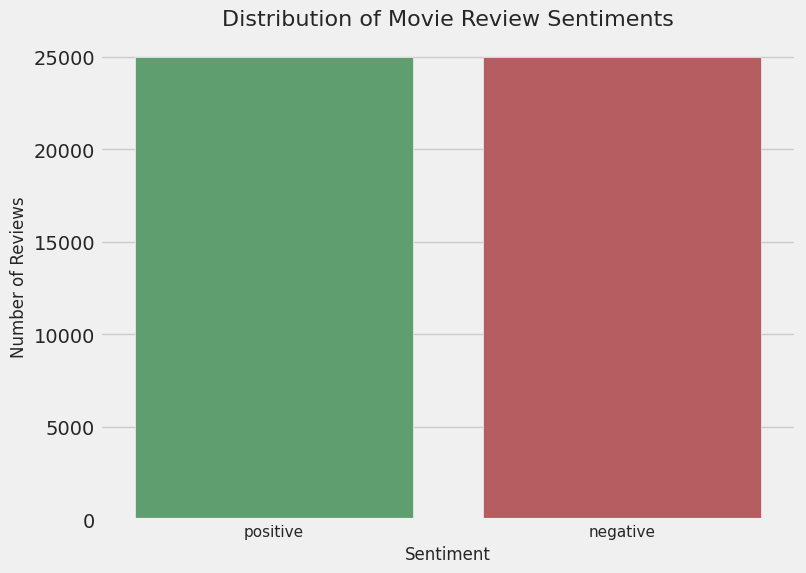

In [3]:
print("\n--- Step 3: Analyzing the Target Variable ('sentiment') ---")

# Get the count of each unique value in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
print("Distribution of sentiments:")
print(sentiment_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['#55a868', '#c44e52']) # Green for positive, Red for negative
plt.title('Distribution of Movie Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=11)
plt.show()



 --- Step 4: Exploring the 'review' Content ---
--- Example of a POSITIVE review ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements ar

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

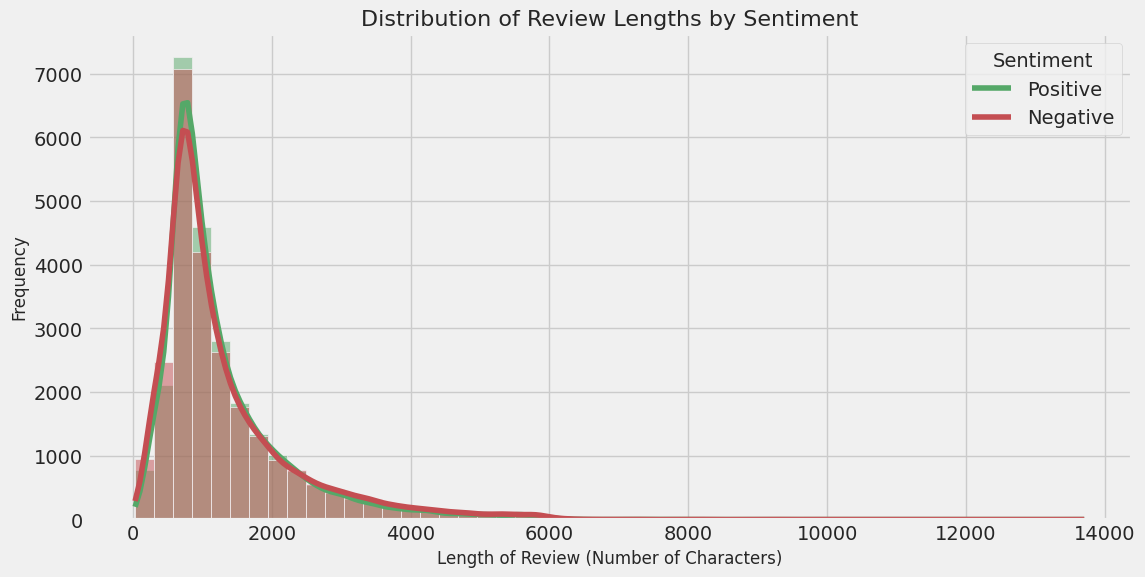


--- Descriptive Statistics for Review Lengths ---
             count        mean          std   min    25%    50%      75%  \
sentiment                                                                  
negative   25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive   25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

               max  
sentiment           
negative    8969.0  
positive   13704.0  


In [4]:
print("\n --- Step 4: Exploring the 'review' Content ---")

# Display a full positive review (let's pick the first one)
print("--- Example of a POSITIVE review ---")
positive_example = df[df['sentiment'] == 'positive']['review'].iloc[0]
print(positive_example)

# Display a full negative review (let's pick the first one)
print("\n--- Example of a NEGATIVE review ---")
negative_example = df[df['sentiment'] == 'negative']['review'].iloc[0]
print(negative_example)


# Let's analyze the length of the reviews
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True, palette=['#c44e52', '#55a868'])
plt.title('Distribution of Review Lengths by Sentiment', fontsize=16)
plt.xlabel('Length of Review (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()

print("\n--- Descriptive Statistics for Review Lengths ---")
print(df.groupby('sentiment')['review_length'].describe())


<div style="border: 2px solid #008CBA; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: sans-serif;">
    <h1 style="color: #005f73; border-bottom: 2px solid #005f73; padding-bottom: 10px;">
        Project Step 1: Data Loading & Initial Exploration
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        This initial phase is the foundation of our project. The primary goal was to load the IMDb dataset and perform a thorough exploratory data analysis (EDA) to understand its structure, content, and characteristics before any cleaning or modeling.
    </p>

<h2 style="color: #0077b6;">Key Objectives & Actions</h2>
    
 <ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 15px;">
            <strong>Data Loading:</strong> Loaded the <code>IMDB Dataset.csv</code> into a pandas DataFrame.
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Initial Data Inspection (Health Check):</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Shape:</strong> Confirmed the dataset contains <strong>50,000 rows</strong> and <strong>2 columns</strong> ('review', 'sentiment').</li>
                <li><strong>Content Preview:</strong> Inspected the first and last few rows with <code>.head()</code> and <code>.tail()</code>, revealing raw text with HTML tags like <code>&lt;br /&gt;</code>.</li>
                <li><strong>Data Types & Nulls:</strong> Used <code>.info()</code> and <code>.isnull().sum()</code> to verify that both columns are of type <code>object</code> and, most importantly, that there are <strong>zero missing values</strong>.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Sentiment Distribution Analysis:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Verified that the <code>sentiment</code> column is <strong>perfectly balanced</strong>, with exactly 25,000 'positive' and 25,000 'negative' reviews. This is an ideal scenario for a classification model, as it avoids bias towards a majority class.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Review Length Analysis:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Statistics:</strong> Calculated descriptive statistics on review character length. The average length is very similar for both sentiments (approx. 1325 for positive vs. 1294 for negative). The longest positive review is 13,704 characters, while the longest negative one is 8,969 characters.</li>
                <li><strong>Visualization:</strong> Plotted histograms for review lengths (as seen in the provided chart). The distributions for positive and negative reviews are highly similar, both being right-skewed. This indicates that most reviews are relatively short, with a long tail of very lengthy reviews.</li>
            </ul>
        </li>
    </ol>

  <div style="background-color: #e0f2f1; border-left: 5px solid #00897b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #004d40; margin-top: 0;">Key Findings & Conclusion</h3>
        <p style="color: #333; margin: 0;">
            The dataset is <strong>complete</strong> (no missing values) and <strong>perfectly balanced</strong>. The feature analysis confirmed that the 'review' text is raw and requires a comprehensive cleaning pipeline. The review length distributions are similar across sentiments, suggesting that length alone may not be a strong predictor of sentiment.
        </p>
    </div>

<div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            With a solid understanding of the data, we will now proceed to <strong>Step 2: Data Cleaning and Preprocessing</strong>.
        </p>
    </div>
</div>


<div style="border: 2px solid #D9534F; border-radius: 10px; padding: 20px; background-color: #fdf5f5; font-family: sans-serif;">
    <h1 style="color: #a94442; border-bottom: 2px solid #a94442; padding-bottom: 10px;">
        Project Step 2: Data Cleaning and Preprocessing
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        Following our initial exploration, this step focuses on transforming the raw, messy review text into a clean and standardized format suitable for machine learning. This is one of the most critical steps in any NLP project.
    </p>

 <h2 style="color: #c9302c;">Text Cleaning Pipeline</h2>
    <p style="font-size: 1.05em; color: #333;">We created a comprehensive function to perform the following sequential operations on each review:</p>
    
<ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Remove HTML Tags:</strong> Used the <code>BeautifulSoup</code> library to parse and remove all HTML artifacts (e.g., <code>&lt;br /&gt;</code>).
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Remove Special Characters & Numbers:</strong> Employed regular expressions (<code>re</code>) to discard everything except alphabetic characters and spaces.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Convert to Lowercase:</strong> Standardized all text to lowercase to ensure words like "Movie" and "movie" are treated as the same token.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Remove Stopwords:</strong> Filtered out common English words (e.g., 'the', 'a', 'is') using NLTK's stopwords list. These words generally don't contribute significant meaning for sentiment analysis.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Lemmatization:</strong> Reduced words to their root form (e.g., 'characters' becomes 'character') using NLTK's <code>WordNetLemmatizer</code>. This helps consolidate vocabulary and focus on word meaning.
        </li>
    </ol>

 <div style="background-color: #f2dede; border-left: 5px solid #ebccd1; padding: 15px; margin-top: 20px;">
        <h3 style="color: #8a6d3b; margin-top: 0;">Outcome & Visualization</h3>
        <p style="color: #333; margin: 0;">
            The cleaning function was applied to the entire dataset, creating a new <strong><code>cleaned_review</code></strong> column. We then generated <strong>Word Clouds</strong> for both positive and negative sentiments from this cleaned text. The visualizations confirmed that distinct and contextually relevant vocabularies emerged for each class (e.g., "great", "best" in positive; "bad", "waste" in negative).
        </p>
    </div>

  <div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            With clean, processed text data, we are now ready to convert these words into numerical features that a machine learning model can understand. The next phase is <strong>Feature Engineering & Building a Baseline Model</strong>.
        </p>
    </div>
</div>


In [5]:
# Import necessary libraries for text cleaning
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Downloads (only need to run once) ---
# Download the 'stopwords' corpus: a list of common words to filter out
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

# Download 'wordnet': a lexical database for English, required for lemmatization
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    print("Downloading NLTK wordnet...")
    nltk.download('wordnet')

# --- Initialize Cleaning Tools ---
# 1. Lemmatizer: To reduce words to their base form
lemmatizer = WordNetLemmatizer()
# 2. Stopwords: Create a set of English stopwords for faster lookup
stop_words = set(stopwords.words('english'))

print("Cleaning tools initialized successfully.")


Cleaning tools initialized successfully.


In [6]:
def clean_text(text):
    """
    Applies a series of cleaning steps to the raw text.
    1. Removes HTML tags.
    2. Removes special characters, numbers, and punctuation.
    3. Converts to lowercase.
    4. Tokenizes text (splits into words).
    5. Removes stopwords.
    6. Lemmatizes words.
    """
    # 1. Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # 2. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # 3. Convert to lowercase
    text = text.lower()
    
    # 4. Tokenize and process
    # 5. Remove stopwords and 6. Lemmatize
    cleaned_words = []
    for word in text.split():
        if word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
            
    return " ".join(cleaned_words)


# Apply the cleaning function to the 'review' column
# This might take a minute or two to run on 50,000 reviews
print("Starting text cleaning process...")
df['cleaned_review'] = df['review'].apply(clean_text)
print("Text cleaning complete. A new 'cleaned_review' column has been added.")

# Compare original vs. cleaned review
print("\n--- Example of Cleaning ---")
print("\nOriginal Review:")
print(df['review'].iloc[1])
print("\nCleaned Review:")
print(df['cleaned_review'].iloc[1])


Starting text cleaning process...
Text cleaning complete. A new 'cleaned_review' column has been added.

--- Example of Cleaning ---

Original Review:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the sce

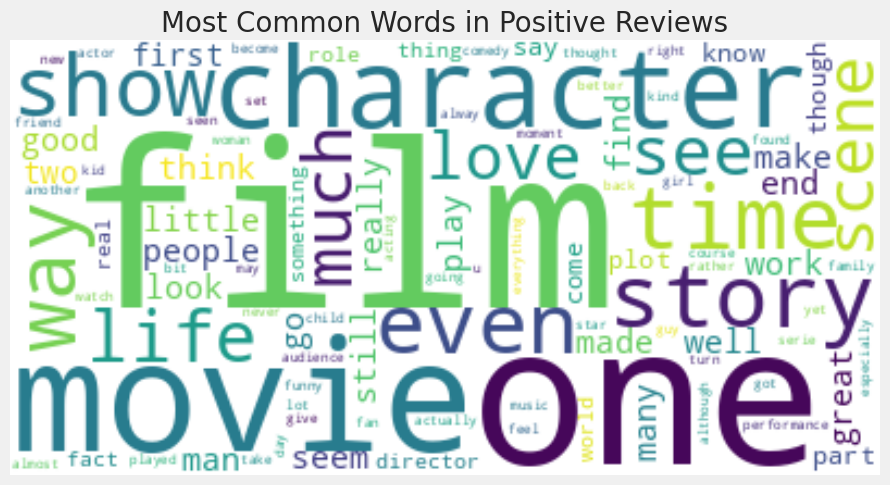

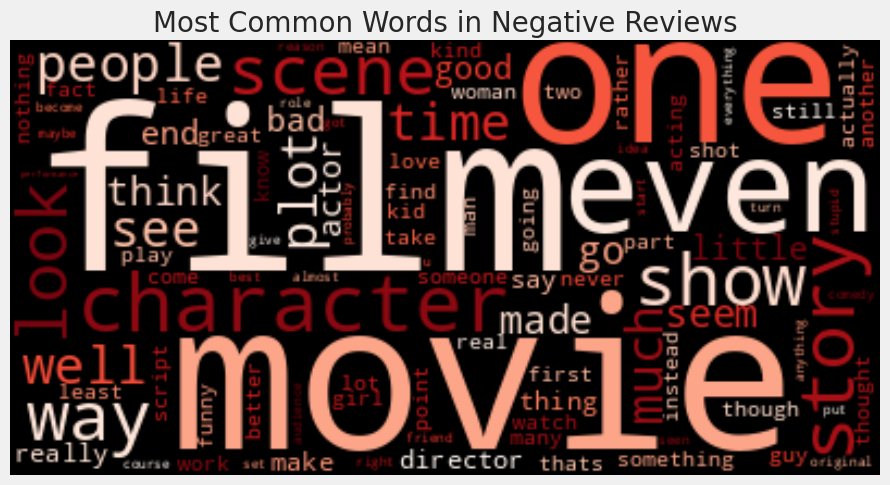

In [7]:
from wordcloud import WordCloud

# --- Word Cloud for Positive Reviews ---
positive_text = " ".join(review for review in df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud_positive = WordCloud(
    max_words=100,
    background_color='white',
    colormap='viridis' # Green-ish colormap
).generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews', fontsize=20)
plt.axis('off')
plt.show()


# --- Word Cloud for Negative Reviews ---
negative_text = " ".join(review for review in df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud_negative = WordCloud(
    max_words=100,
    background_color='black',
    colormap='Reds' # Red-ish colormap
).generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews', fontsize=20)
plt.axis('off')
plt.show()



<div style="background-color: #f2dede; border-left: 5px solid #ebccd1; padding: 15px; margin-top: 20px; font-family: sans-serif;">
    <h3 style="color: #8a6d3b; margin-top: 0;">Analysis of Cleaning Results</h3>
    <p style="color: #333;">
        The data cleaning process successfully transformed the raw reviews into a standardized format. The results were visualized using word clouds, which provided several key insights:
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Distinct Vocabularies:</strong> The word clouds clearly show that positive and negative reviews use different sets of words to express their opinions.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Positive Keywords:</strong> The positive reviews are characterized by words like <strong>"great," "love," "good," "well,"</strong> and <strong>"life,"</strong> indicating a focus on quality, performance, and emotional connection.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Negative Keywords:</strong> The negative reviews are dominated by critical terms such as <strong>"bad," "plot," "acting," "waste,"</strong> and <strong>"nothing,"</strong> pointing to dissatisfaction with the story, performances, and overall value.
        </li>
    </ul>
    <p style="color: #333; font-weight: bold; margin-top: 15px;">
        This clear distinction in word usage confirms that our cleaning was effective and that the text now contains strong, learnable patterns for a sentiment analysis model.
    </p>
</div>


<div style="border: 2px solid #337AB7; border-radius: 10px; padding: 20px; background-color: #f5f9fd; font-family: sans-serif;">
    <h1 style="color: #286090; border-bottom: 2px solid #286090; padding-bottom: 10px;">
        Project Step 3: Feature Engineering & Baseline Model
    </h1>
    
 <p style="font-size: 1.1em; color: #333;">
        With clean text data, the next step is to convert it into a numerical representation that a machine learning model can process. We will then build and evaluate a simple <strong>baseline model</strong> to establish a performance benchmark for our project.
    </p>

<h2 style="color: #337AB7;">1. Feature Engineering with TF-IDF</h2>
    <p style="font-size: 1.05em; color: #333;">
        We need to transform our <code>cleaned_review</code> text column into numerical vectors. For this, we use the <strong>Term Frequency-Inverse Document Frequency (TF-IDF)</strong> technique.
    </p>
    
<ul style="list-style-type: disc; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Term Frequency (TF):</strong> Measures how often a word appears in a single review.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Inverse Document Frequency (IDF):</strong> Reduces the weight of words that are common across all reviews (like "movie") and increases the weight of words that are rarer and more specific.
        </li>
    </ul>
    
<p style="font-size: 1.05em; color: #333;">
        The process involves splitting the data into an 80% training set and a 20% testing set. The <code>TfidfVectorizer</code> is then <strong>fit only on the training data</strong> to learn the vocabulary and IDF weights, and subsequently used to transform both the training and testing sets.
    </p>

 <h2 style="color: #337AB7;">2. Building a Baseline Model: Logistic Regression</h2>
    <p style="font-size: 1.05em; color: #333;">
        To create a performance baseline, we chose a <strong>Logistic Regression</strong> model. It's a fast, efficient, and highly effective algorithm for text classification tasks. The model was trained on the TF-IDF vectors generated from the training data.
    </p>

 <div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Baseline Model Performance & Evaluation</h3>
        <p style="color: #333;">
            After training, the model was evaluated on the unseen test data. The key performance metrics are:
        </p>
        <ul style="list-style-type: none; padding-left: 0; color: #333;">
            <li style="margin-bottom: 10px;">
                <strong>Accuracy:</strong> The model achieved an accuracy of approximately <strong>89.6%</strong>, which is a very strong starting point. This means it correctly classified the sentiment of nearly 9 out of 10 reviews.
            </li>
            <li style="margin-bottom: 10px;">
                <strong>Classification Report:</strong> The precision, recall, and F1-score for both 'positive' and 'negative' classes are balanced and high (around 0.90), indicating the model performs equally well on both sentiments.
            </li>
            <li style="margin-bottom: 10px;">
                <strong>Confusion Matrix:</strong> The matrix visualizes the model's predictions, showing the exact number of true positives, true negatives, false positives, and false negatives. It confirms the balanced performance and high accuracy observed.
            </li>
        </ul>
        <p style="color: #333; font-weight: bold; margin-top: 15px;">
            This excellent baseline performance validates our entire pipeline so far, from data cleaning to feature engineering.
        </p>
    </div>

 <div style="background-color: #fcf8e3; border-left: 5px solid #8a6d3b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #8a6d3b; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            Now that we have a solid baseline, we can explore more advanced techniques to see if we can improve upon this result. Potential next steps include experimenting with more sophisticated models (like Naive Bayes, SVM, or even deep learning models like LSTMs) or trying different feature engineering methods (like Word2Vec or GloVe embeddings).
        </p>
    </div>
</div>
